# Tennis Ace: a Linear Regression Challenge

With data provided by CodeCademy, the goal of this project is to create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling the Association of Tennis Professionals (ATP) data, I will determine what it takes to be one of the best tennis players in the world.

The first thing to do, is to import every library to be used on this project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### 1. Game, Set, Match!”

No three words are sweeter to hear as a tennis player than those, which indicate that a player has beaten their opponent. While you can head down to your nearest court and aim to overcome your challenger across the net without much practice, a league of professionals spends day and night, month after month practicing to be among the best in the world. Today I will put my linear regression knowledge to the test to better understand what it takes to be an all-star tennis player.

Provided in tennis_stats.csv is data from the men’s professional tennis league, which is called the ATP (Association of Tennis Professionals). Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017 are provided in file. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes. Let´s load the csv into a DataFrame and investigate it to gain familiarity with the data.

In [2]:
#Taking a look to see a little bit of this dataset.
df = pd.read_csv("tennis_stats.csv")
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [3]:
#It is important to know which kind of information we have.
df.columns

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')

In [5]:
#As an argentinian tennis fan, I am taking a look of one of my favourite players.

elpeque = df[df.Player == "Diego Schwartzman"]

elpeque

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
35,Diego Schwartzman,2013,0.70,0.56,0.27,0.48,0.57,6,0.47,57,...,0.27,0.39,67,0.58,0.47,0.53,1,5,113026,15
757,Diego Schwartzman,2016,0.61,0.66,0.32,0.50,0.53,77,0.47,258,...,0.30,0.41,397,0.72,0.50,0.60,17,17,441494,15
766,Diego Schwartzman,2014,0.60,0.57,0.37,0.50,0.49,4,0.49,48,...,0.36,0.42,71,0.62,0.48,0.54,2,4,256652,15
1154,Diego Schwartzman,2015,0.58,0.64,0.31,0.50,0.52,88,0.44,255,...,0.27,0.39,386,0.68,0.49,0.58,11,22,374619,15


### 2. Relationship plotting

Let's Perform exploratory analysis on the data by plotting different features against the different outcomes. What relationships do I find between the features and outcomes? Do any of the features seem to predict the outcomes?

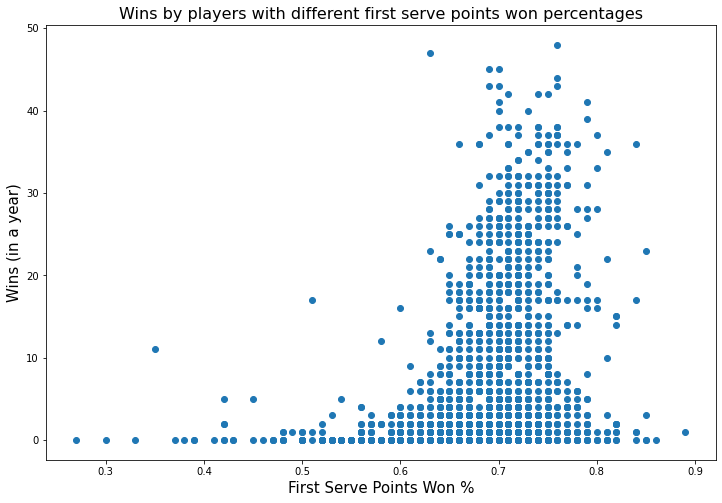

In [6]:
# First thought: Do First Serve Points won seem to predict the wins of the players?

plt.figure(figsize = (12,8))
plt.scatter(df.FirstServePointsWon, df.Wins)
plt.xlabel("First Serve Points Won %", size = 15)
plt.ylabel("Wins (in a year)", size = 15)
plt.title("Wins by players with different first serve points won percentages", size = 16)
plt.show()

#There is not a clear tendency of prediction here. In fact, most players have between 60% and 80% of first serve points won.

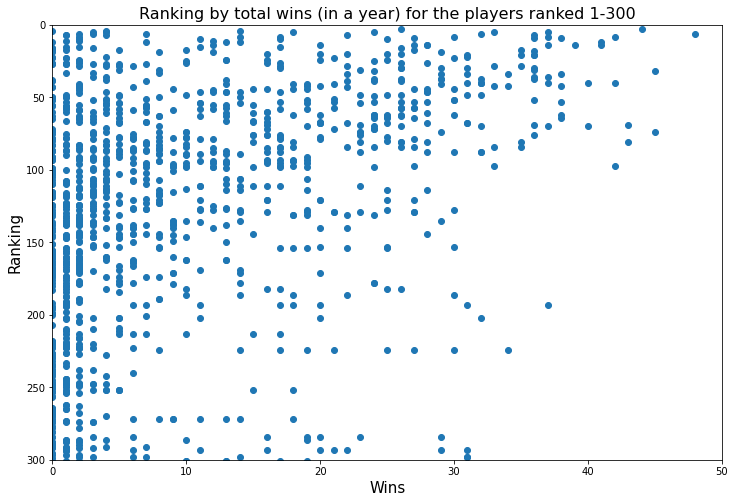

In [7]:
#Now, do the number of wins per year predict the rankings?

ax = plt.figure(figsize = (12,8))
plt.scatter(df.Wins, df.Ranking)
zoom = plt.axis([0,50,300,0])
plt.xlabel("Wins", size = 15)
plt.ylabel("Ranking", size =15)
plt.title("Ranking by total wins (in a year) for the players ranked 1-300", size = 16)
plt.show()

#As we can see in this plot, there are lots of entries of the dataset with none or almost none wins in a year.
#However, there can be found a small tendency that tells that wins can have a role on the prediction of the ranking

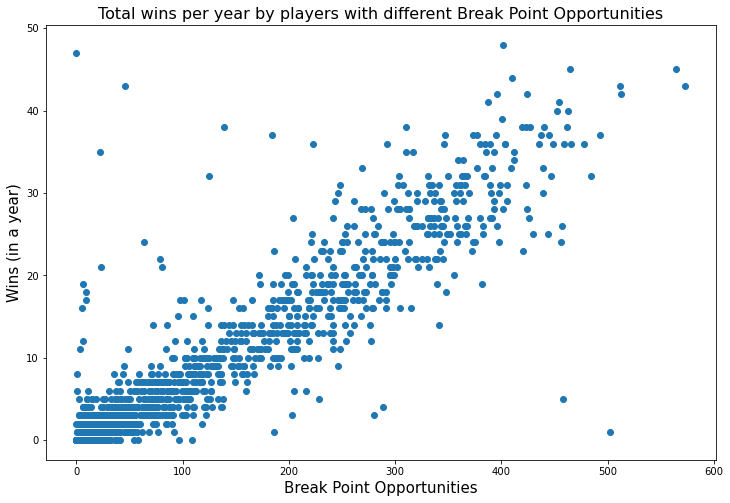

In [8]:
#How about break point opportunities and wins?

ax = plt.figure(figsize = (12,8))
plt.scatter(df.BreakPointsOpportunities, df.Wins)
plt.xlabel("Break Point Opportunities", size = 15)
plt.ylabel("Wins (in a year)", size = 15)
plt.title("Total wins per year by players with different Break Point Opportunities", size = 16)
plt.show()

#As we can see below, break point opportunities can predict with high accuracy if a player will have a good or
#bad year in terms of wins.

### 3. Single linear regression model

I will use one feature from the dataset to build a single feature linear regression model on the data. The model, at this point, should use only one feature and predict one of the outcome columns. Before training the model, I will split my data into training and test datasets so that I can evaluate your model on the test set. How does your model perform? Let's plot the model’s predictions on the test set against the actual outcome variable to visualize the performance.

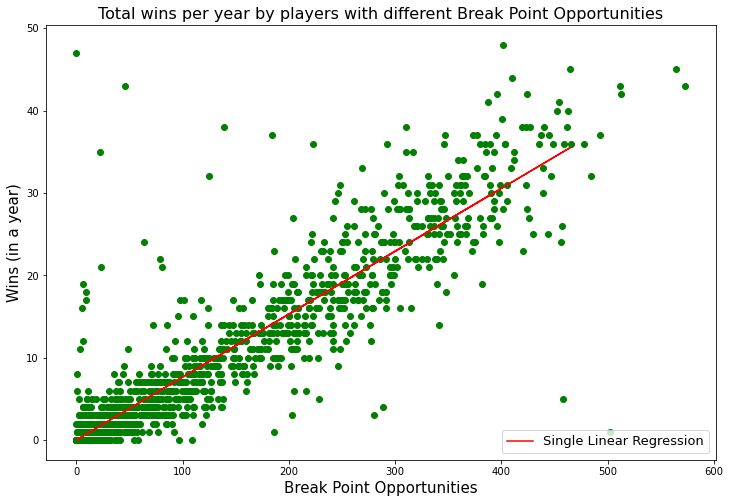

In [9]:
#As the break point opportunities vs wins graph had a great result, I wil start with this one.

break_point_op = df[['BreakPointsOpportunities']]
wins = df[['Wins']]

x_train, x_test, y_train, y_test = train_test_split(break_point_op,wins,train_size = 0.8, test_size = 0.2)

simple_linear_regr = LinearRegression()
simple_linear_regr.fit(x_train,y_train)
y_values = simple_linear_regr.predict(x_test)

ax = plt.figure(figsize = (12,8))
plt.scatter(df.BreakPointsOpportunities, df.Wins, color = 'green')
plt.plot(x_test, y_values, color = 'red', label = 'Single Linear Regression')
plt.xlabel("Break Point Opportunities", size = 15)
plt.ylabel("Wins (in a year)", size = 15)
plt.title("Total wins per year by players with different Break Point Opportunities", size = 16)
plt.legend(loc = 4, fontsize = 13)
plt.show()

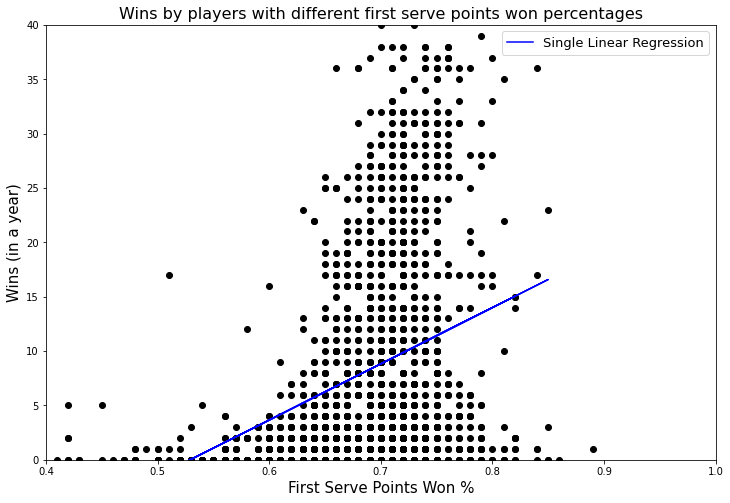

In [11]:
#Now, I will show the regression line for another graph who had not a great initial result

first_serve_won = df[['FirstServePointsWon']]
wins = df[['Wins']]

x_train, x_test, y_train, y_test = train_test_split(first_serve_won,wins,train_size = 0.8, test_size = 0.2)

simple_linear_regr = LinearRegression()
simple_linear_regr.fit(x_train,y_train)
y_values = simple_linear_regr.predict(x_test)

plt.figure(figsize = (12,8))
plt.axis([0.4,1,0,40])
plt.scatter(df.FirstServePointsWon, df.Wins, color = 'black')
plt.xlabel("First Serve Points Won %", size = 15)
plt.ylabel("Wins (in a year)", size = 15)
plt.plot(x_test, y_values, color = 'blue', label = 'Single Linear Regression')
plt.title("Wins by players with different first serve points won percentages", size = 16)
plt.legend(fontsize = 13)
plt.show()

### 4. Two variable linear regression model

It is time to create a few linear regression models that use two features to predict yearly earnings. Which set of two features results in the best model?

I will start to measure my results with the score method to evaluate the model accuracy (the score goes from 0 to 1)

In [24]:
#It may seem obvious, but maybe it is not that way. How clear is the influence between ranking and wins, to determine winnings?

rank_and_wins = df[['Ranking','Wins']]
earnings = df['Winnings']

x_train, x_test, y_train, y_test = train_test_split(rank_and_wins,earnings,train_size = 0.8, test_size = 0.2)

twovariable_linear_regr1 = LinearRegression()
twovariable_linear_regr1.fit(x_train,y_train)

score1 = twovariable_linear_regr1.score(x_test, y_test)
print(score1)

0.8474685574917395


In [23]:
#Now let's try something different. Do first serve points won and break points saved have a strong influence in earnings?

serve_and_defend = df[['FirstServePointsWon','BreakPointsSaved']]
earnings = df['Winnings']

x_train, x_test, y_train, y_test = train_test_split(serve_and_defend,earnings,train_size = 0.8, test_size = 0.2)

twovariable_linear_regr2 = LinearRegression()
twovariable_linear_regr2.fit(x_train,y_train)

score2 = twovariable_linear_regr2.score(x_test, y_test)
print(score2)

0.14185041640937768


### 5. Multiple linear regression model


I will create a linear regression model that use multiple features to predict yearly earnings. Then, I will try to adjust it to have a better outcome.

In [35]:
#Under the name "features", I am selecting the variables that I think can have a big impact on earnings

features = df[['FirstServePointsWon','FirstServeReturnPointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsSaved','ReturnGamesWon','ServiceGamesWon','TotalPointsWon']]
earnings = df[['Winnings']]

x_train, x_test, y_train, y_test = train_test_split(features,earnings,train_size = 0.8, test_size = 0.2)

multiple_linear_regr3 = LinearRegression()
multiple_linear_regr3.fit(x_train,y_train)


score3 = multiple_linear_regr3.score(x_test, y_test)
print(score3)

0.581569929059309


In [25]:
#If I print the .coef method for the model, I can visualize which variable have more weight.

multiple_linear_regr3.coef_

array([[-414498.76745694, -123303.22605569,   13669.71811098,
           1463.83672967, -121591.66292015,  -19353.72645087,
         630977.17409503,  184728.20107298,  490774.69613024]])

In [102]:
#After removing some of the variables with the least coefficient, I will call the model again to see its score

features2 = df[['FirstServePointsWon','FirstServeReturnPointsWon','Aces',
'BreakPointsConverted','ServiceGamesWon']]
earnings = df[['Winnings']]

features_train, features_test, earnings_train, earnings_test = train_test_split(features2,earnings,train_size = 0.8)

multiple_linear_regr4 = LinearRegression()
multiple_linear_regr4.fit(features_train, earnings_train)
earnings_pred = multiple_linear_regr4.predict(features_test)

score4 = multiple_linear_regr4.score(features_test, earnings_test)
print(score4)

0.5815578894115117


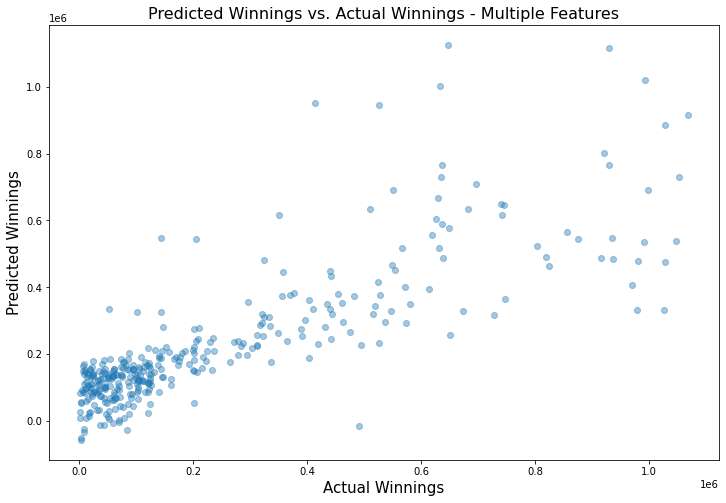

In [117]:
#Finally, let's plot the actual winnings vs the expected ones

features_train, features_test, earnings_train, earnings_test = train_test_split(features2,earnings,train_size = 0.8)

multiple_linear_regr4 = LinearRegression()
multiple_linear_regr4.fit(features_train, earnings_train)
earnings_pred = multiple_linear_regr4.predict(features_test)

ax = plt.figure(figsize = (12,8))
plt.scatter(earnings_test, earnings_pred, alpha = 0.4)
plt.title('Predicted Winnings vs. Actual Winnings - Multiple Features', size = 16)
plt.xlabel("Actual Winnings", size = 15)
plt.ylabel("Predicted Winnings", size = 15)
plt.show()